<a href="https://colab.research.google.com/github/sidhunt/ML-implementations/blob/main/Final_Project_CIFAR100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Combined DCNN-ELM classifier to classify CIFAR100 dataset by SIDDHANT BADOLA(ID-1154586) 
The following keras model achieves a testing accuracy of 57.6% on cifar100 before feature extraction after which the features are transfered to elm classifier which achieves testing accuracy of 22.21%.

In [ ]:
import tensorflow as tf
from tensorflow import keras as k
from keras.utils import np_utils,to_categorical
import matplotlib.pyplot as plt
import os
import numpy as np
from keras.models import Model

Importing CIFAR100 dataset

In [ ]:
(x_train,Y_train),(x_test,Y_test)= k.datasets.cifar100.load_data()

169009152/169001437 [==============================] - 4s 0us/step


In [ ]:
print(x_train.shape)

(50000, 32, 32, 3)


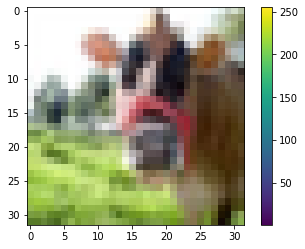

In [ ]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
def preprocess(X,Y):
  X=k.applications.densenet.preprocess_input(X)
  Y=to_categorical(Y)
  return X,Y

x_train,y_train=preprocess(x_train,Y_train)
x_test,y_test=preprocess(x_test,Y_test)


Keras model intitalization

In [ ]:
init= k.initializers.he_normal()
inp_tensor = k.Input(shape=(32,32,3))
resized_img=k.layers.Lambda(lambda image: tf.image.resize(image,(224,224)))(inp_tensor)
mod=k.applications.DenseNet201(include_top=False,weights='imagenet',input_tensor=resized_img,input_shape=(224,224,3),pooling='max',)
for layer in mod.layers:
  layer.trainable=False

out=mod.layers[-1].output
flat=k.layers.Flatten()
out=flat(out)

Dlayer = k.layers.Dense(units=256,
                           activation='elu',
                           kernel_initializer=init,
                           kernel_regularizer=k.regularizers.l2())
out = Dlayer(out)
dropout = k.layers.Dropout(0.3)
out = dropout(out)
softmax = k.layers.Dense(units=100,
                         activation='softmax',
                         kernel_initializer=init,
                         kernel_regularizer=k.regularizers.l2())
out = softmax(out)
model = k.models.Model(inputs=inp_tensor, outputs=out)

schedule=k.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-1,decay_steps=100000,decay_rate=0.95,staircase=True,)   
sgd=k.optimizers.SGD(learning_rate=schedule)
model.compile(optimizer=sgd,metrics=['accuracy'],loss=k.losses.CategoricalCrossentropy(from_logits=False,))

74842112/74836368 [==============================] - 1s 0us/step


Model summary

In [ ]:
model.summary()
print(len(model.layers))

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           lambda[0][0]                     
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
_______________________________________________________________________________________

Training and re-building model 3 times

In [ ]:
history=model.fit(x_train,y_train, epochs=10,steps_per_epoch=100,validation_data=(x_test,y_test),verbose=1,batch_size=128,use_multiprocessing=True,) 
loss,acc=model.evaluate(x_test,y_test,verbose='1')
print("loss=",loss,"\nacc=",acc)

Epoch 1/10
100/100 [==============================] - 92s 918ms/step - loss: 11.7385 - accuracy: 0.0277 - val_loss: 8.9494 - val_accuracy: 0.1189
Epoch 2/10
100/100 [==============================] - 96s 958ms/step - loss: 8.0201 - accuracy: 0.1210 - val_loss: 6.2534 - val_accuracy: 0.2465
Epoch 3/10
100/100 [==============================] - 97s 968ms/step - loss: 5.9549 - accuracy: 0.2296 - val_loss: 4.7429 - val_accuracy: 0.3805
Epoch 4/10
100/100 [==============================] - 99s 994ms/step - loss: 4.5526 - accuracy: 0.3468 - val_loss: 3.6768 - val_accuracy: 0.4745
Epoch 5/10
100/100 [==============================] - 97s 968ms/step - loss: 3.7146 - accuracy: 0.4180 - val_loss: 3.1497 - val_accuracy: 0.5145
Epoch 6/10
100/100 [==============================] - 97s 968ms/step - loss: 3.1843 - accuracy: 0.4675 - val_loss: 3.0083 - val_accuracy: 0.4575
Epoch 7/10
100/100 [==============================] - 97s 969ms/step - loss: 2.8355 - accuracy: 0.4993 - val_loss: 2.6065 - val_a

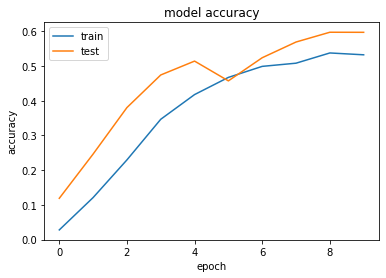

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.compile(optimizer=sgd,metrics=['accuracy'],loss=k.losses.CategoricalCrossentropy(from_logits=False,))
history=model.fit(x_train,y_train, epochs=10,steps_per_epoch=100,validation_data=(x_test,y_test),verbose=1,batch_size=128,use_multiprocessing=True,) 
loss,acc=model.evaluate(x_test,y_test,verbose='1')
print("loss=",loss,"\nacc=",acc)

Epoch 1/10
100/100 [==============================] - 100s 997ms/step - loss: 2.2369 - accuracy: 0.5639 - val_loss: 2.2019 - val_accuracy: 0.5753
Epoch 2/10
100/100 [==============================] - 97s 971ms/step - loss: 2.2575 - accuracy: 0.5554 - val_loss: 2.0853 - val_accuracy: 0.5932
Epoch 3/10
100/100 [==============================] - 97s 969ms/step - loss: 2.2300 - accuracy: 0.5580 - val_loss: 2.0790 - val_accuracy: 0.5953
Epoch 4/10
100/100 [==============================] - 97s 968ms/step - loss: 2.2011 - accuracy: 0.5638 - val_loss: 2.0693 - val_accuracy: 0.5924
Epoch 5/10
100/100 [==============================] - 97s 969ms/step - loss: 2.1223 - accuracy: 0.5845 - val_loss: 2.0701 - val_accuracy: 0.5872
Epoch 6/10
100/100 [==============================] - 97s 970ms/step - loss: 2.1525 - accuracy: 0.5741 - val_loss: 2.0467 - val_accuracy: 0.6060
Epoch 7/10
100/100 [==============================] - 97s 970ms/step - loss: 2.1475 - accuracy: 0.5735 - val_loss: 2.0027 - val_a

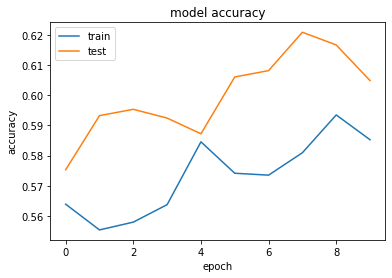

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.compile(optimizer=sgd,metrics=['accuracy'],loss=k.losses.CategoricalCrossentropy(from_logits=False,))
history=model.fit(x_train,y_train, epochs=10,steps_per_epoch=100,validation_data=(x_test,y_test),verbose=1,batch_size=128,use_multiprocessing=True,) 
loss,acc=model.evaluate(x_test,y_test,verbose='1')
print("loss=",loss,"\nacc=",acc)

Epoch 1/10
100/100 [==============================] - 100s 997ms/step - loss: 2.0359 - accuracy: 0.6045 - val_loss: 2.0993 - val_accuracy: 0.5814
Epoch 2/10
100/100 [==============================] - 97s 968ms/step - loss: 2.0892 - accuracy: 0.5910 - val_loss: 2.2613 - val_accuracy: 0.5485
Epoch 3/10
100/100 [==============================] - 97s 970ms/step - loss: 2.1023 - accuracy: 0.5851 - val_loss: 1.9491 - val_accuracy: 0.6264
Epoch 4/10
100/100 [==============================] - 96s 965ms/step - loss: 2.0980 - accuracy: 0.5782 - val_loss: 2.0421 - val_accuracy: 0.5937
Epoch 5/10
100/100 [==============================] - 97s 969ms/step - loss: 2.0556 - accuracy: 0.5959 - val_loss: 1.9572 - val_accuracy: 0.6215
Epoch 6/10
100/100 [==============================] - 97s 968ms/step - loss: 2.0551 - accuracy: 0.6013 - val_loss: 2.0932 - val_accuracy: 0.5946
Epoch 7/10
100/100 [==============================] - 97s 969ms/step - loss: 2.0918 - accuracy: 0.5877 - val_loss: 2.0486 - val_a

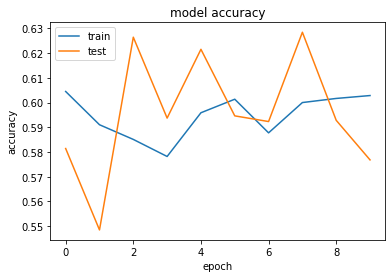

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import numpy as np

In [ ]:
W=model.get_weights()
model.save_weights("out_weights.h5")

In [ ]:
!pip install hpelm
from hpelm import ELM

     |████████████████████████████████| 51kB 4.2MB/s 
     |████████████████████████████████| 163kB 13.2MB/s 


In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
X=np.reshape(x_train,(50000,-1))
#Xt=np.reshape(x_train,(10000,-1))

In [ ]:
Xtest=np.reshape(x_test,(10000,-1))
Xtest.shape

(10000, 3072)

In [ ]:
X.shape

(50000, 3072)

Command below extracts the features from the trained model

In [ ]:

features=model.predict(x_test[:1])

In [ ]:
print(features.shape)


(1, 100)


In [ ]:
print(features[0])

[5.95917618e-06 9.02744489e-07 2.39923727e-04 2.58810887e-05
 9.63758339e-07 1.54618647e-05 7.74856630e-07 5.80160167e-06
 1.53536967e-04 1.26248315e-05 2.43503928e-05 5.64846014e-05
 5.18923160e-04 2.64232276e-05 5.32984559e-05 4.43346845e-03
 1.23686368e-06 3.39891133e-03 1.33763888e-06 1.25784369e-04
 9.44013266e-07 5.09726779e-05 1.54865775e-04 2.22341827e-04
 7.02395937e-07 9.37357163e-06 8.42718782e-06 2.09956343e-05
 8.26821179e-06 2.67572959e-05 2.58498971e-04 3.16557562e-05
 1.94962602e-03 6.62164821e-05 1.79766380e-06 8.82864988e-05
 2.82065940e-07 2.06704251e-03 3.29852946e-06 3.07062646e-06
 2.22885297e-04 4.44938769e-06 6.17837668e-06 1.12357629e-05
 3.82417602e-06 2.87678154e-06 2.27161276e-04 5.51720586e-06
 1.41464907e-05 2.47188836e-01 2.29375837e-06 7.43907458e-06
 1.03975781e-05 6.82773452e-06 2.16867352e-06 2.05702490e-05
 8.34281382e-05 7.83692230e-05 1.98941507e-06 1.88635278e-03
 3.63082305e-04 5.90117997e-06 1.86527577e-05 3.62175547e-06
 2.40730719e-06 2.780406

We feed the features into given ELM classifier

In [ ]:
elm=ELM(3072,100, w=features[0],batch=10000,)
elm.add_neurons(10000,func='tanh')

elm.train(X,y_train,'c')

In [ ]:
Y=elm.predict(Xtest)

In [ ]:
Y.shape

(10000, 100)

In [ ]:
print(np.argmax(Y[9040]))

94


In [ ]:
(x_trainF,y_trainF),(x_testF,y_testF)= k.datasets.cifar100.load_data()

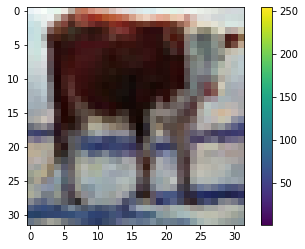

In [ ]:
plt.figure()
plt.imshow(x_testF[9040])
plt.colorbar()
plt.grid(False)
plt.show()

We finally get classification error below

In [ ]:
elm.error(y_test,Y)

0.7779

In [ ]:
coarse_label = [
'apple', # id 0
'aquarium_fish',
'baby',
'bear',
'beaver',
'bed',
'bee',
'beetle',
'bicycle',
'bottle',
'bowl',
'boy',
'bridge',
'bus',
'butterfly',
'camel',
'can',
'castle',
'caterpillar',
'cattle',
'chair',
'chimpanzee',
'clock',
'cloud',
'cockroach',
'couch',
'crab',
'crocodile',
'cup',
'dinosaur',
'dolphin',
'elephant',
'flatfish',
'forest',
'fox',
'girl',
'hamster',
'house',
'kangaroo',
'computer_keyboard',
'lamp',
'lawn_mower',
'leopard',
'lion',
'lizard',
'lobster',
'man',
'maple_tree',
'motorcycle',
'mountain',
'mouse',
'mushroom',
'oak_tree',
'orange',
'orchid',
'otter',
'palm_tree',
'pear',
'pickup_truck',
'pine_tree',
'plain',
'plate',
'poppy',
'porcupine',
'possum',
'rabbit',
'raccoon',
'ray',
'road',
'rocket',
'rose',
'sea',
'seal',
'shark',
'shrew',
'skunk',
'skyscraper',
'snail',
'snake',
'spider',
'squirrel',
'streetcar',
'sunflower',
'sweet_pepper',
'table',
'tank',
'telephone',
'television',
'tiger',
'tractor',
'train',
'trout',
'tulip',
'turtle',
'wardrobe',
'whale',
'willow_tree',
'wolf',
'woman',
'worm',
]

In [ ]:
acc=0
total=x_test.shape[0]
for i in range(total):
  pred=np.argmax(Y[i])
  act=np.argmax(y_test[i])
  print(i," pred=",pred,"\t actual=",act)
  if(pred==act):
    acc+=1
    print("matches")
  
print("Accuracy =",(acc/total))

Streaming output truncated to the last 5000 lines.
5909  pred= 93 	 actual= 73
5910  pred= 58 	 actual= 62
5911  pred= 7 	 actual= 97
5912  pred= 72 	 actual= 97
5913  pred= 0 	 actual= 0
matches
5914  pred= 57 	 actual= 57
matches
5915  pred= 4 	 actual= 19
5916  pred= 42 	 actual= 46
5917  pred= 47 	 actual= 53
5918  pred= 76 	 actual= 69
5919  pred= 47 	 actual= 47
matches
5920  pred= 43 	 actual= 13
5921  pred= 36 	 actual= 84
5922  pred= 35 	 actual= 67
5923  pred= 13 	 actual= 43
5924  pred= 14 	 actual= 80
5925  pred= 2 	 actual= 59
5926  pred= 20 	 actual= 20
matches
5927  pred= 71 	 actual= 76
5928  pred= 62 	 actual= 65
5929  pred= 82 	 actual= 79
5930  pred= 99 	 actual= 99
matches
5931  pred= 21 	 actual= 62
5932  pred= 83 	 actual= 58
5933  pred= 41 	 actual= 55
5934  pred= 11 	 actual= 26
5935  pred= 91 	 actual= 1
5936  pred= 75 	 actual= 46
5937  pred= 21 	 actual= 90
5938  pred= 96 	 actual= 66
5939  pred= 63 	 actual= 69
5940  pred= 27 	 actual= 39
5941  pred= 60 	 ac

Final ELM accuracy obtained is 22.21% for cifar100